[1 1 0 ... 1 1 1]
正确率为： 0.9417789757412399
准确率： 0.9417789757412399
精确率： 0.9597600599850038
查全率： 0.9592805395953036


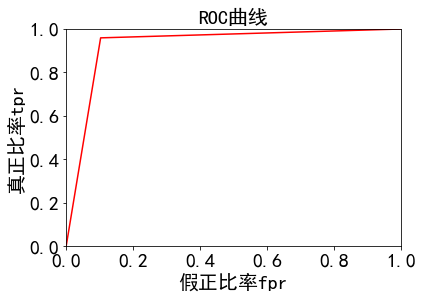

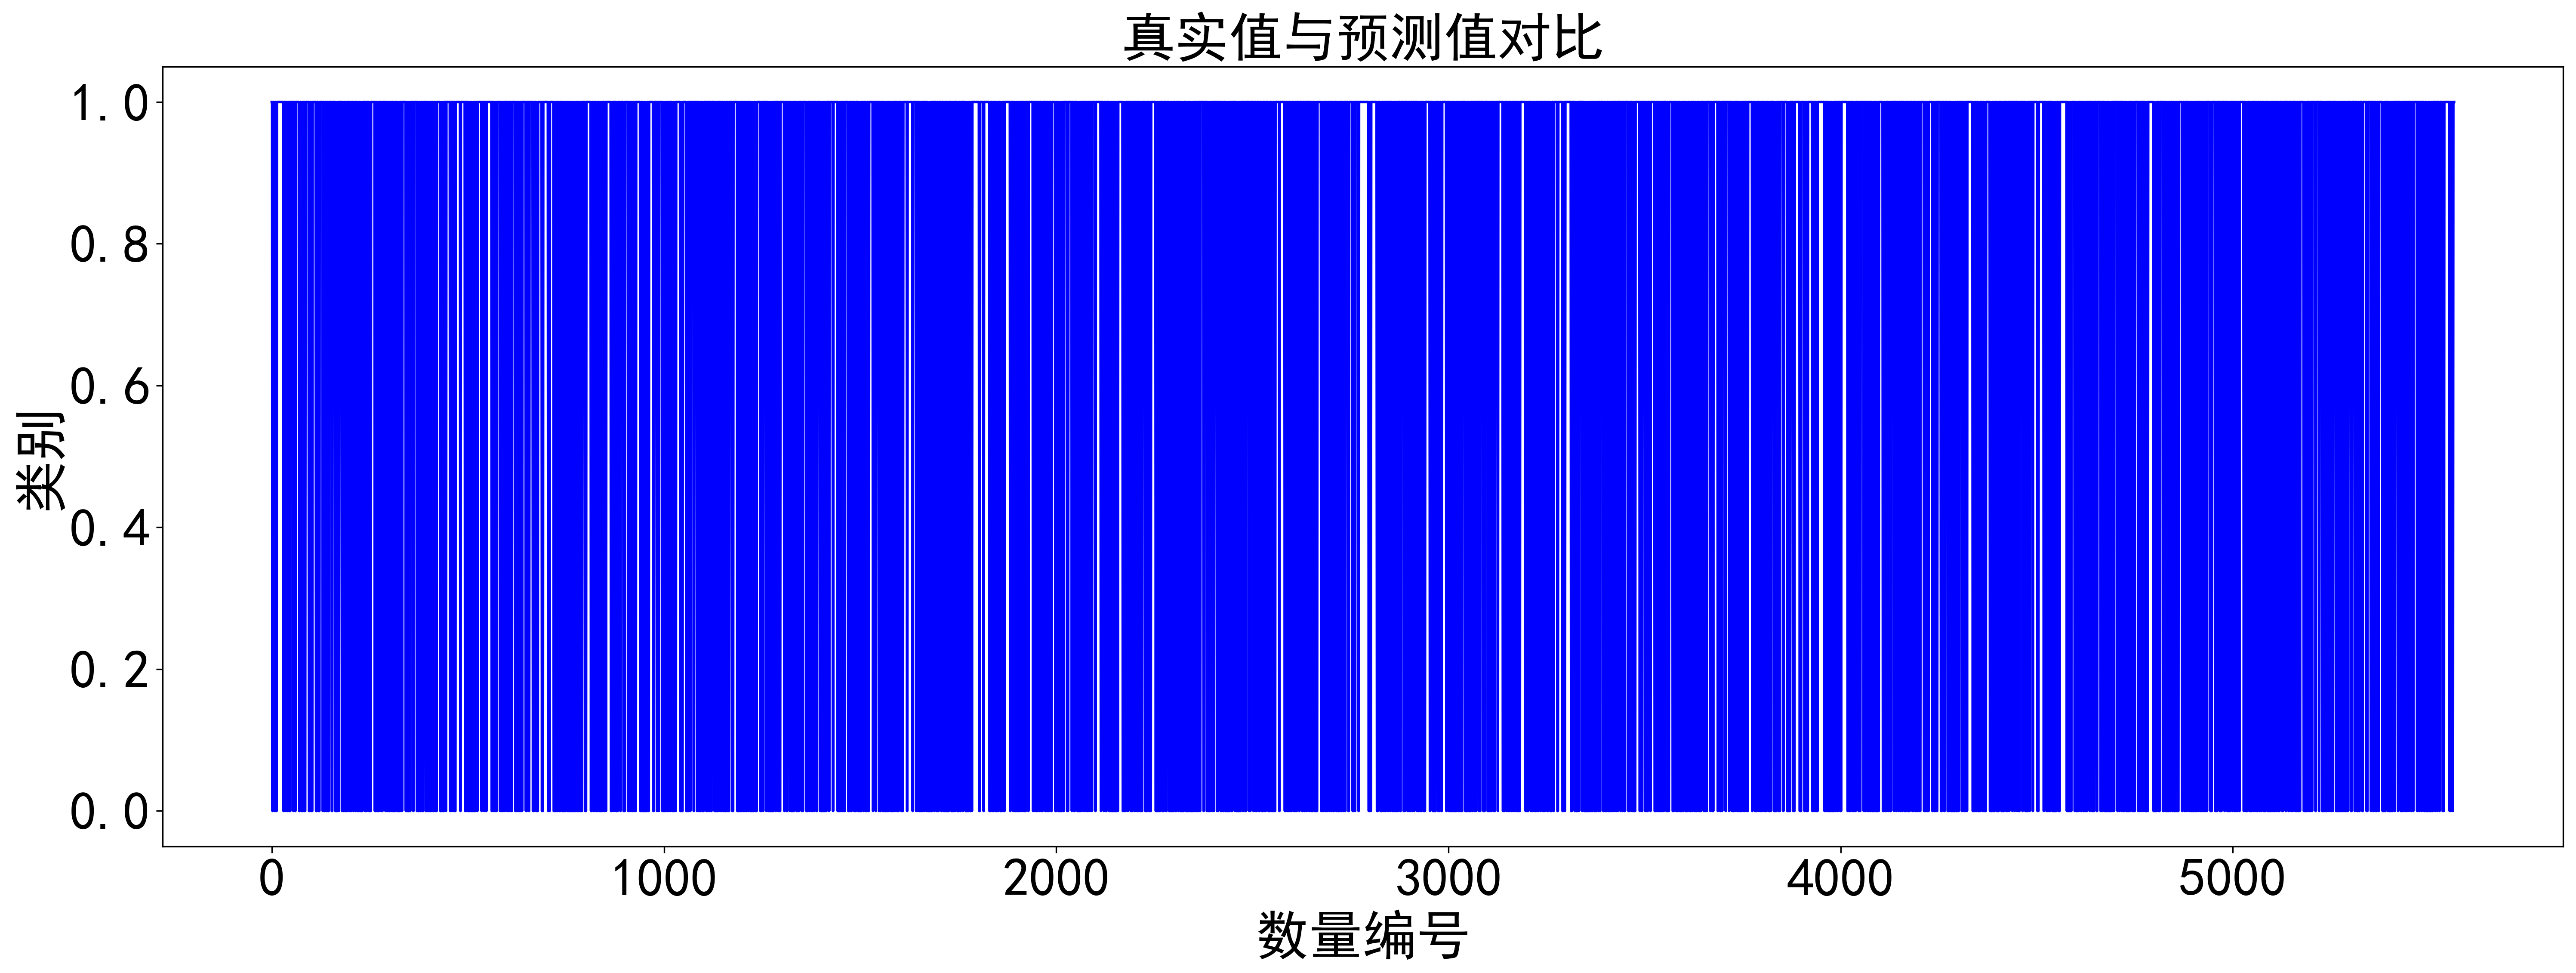

In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve
import matplotlib.pyplot as plt
from six import StringIO
#import pydot
import pydotplus
from IPython.display import display,Image

#处理数据
def data(path):
    data=pd.read_csv(path)
    data=data.astype(int)#强制转换为int类型
    x=data.iloc[:,1:-1]#进行特征和标签的数据切片
    y=data.iloc[:,-1]
    
    
    #分测试集和训练集
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)
    return x_train,x_test,y_train,y_test

#决策树实现
def id3(x_train,x_test,y_train,y_test):
    id3_tree=tree.DecisionTreeClassifier(criterion="entropy")#使用ID3决策树
    id3_tree.fit(x_train,y_train)#训练
    y_predict=id3_tree.predict(x_test)#预测
    
    #可视化树结构
    dot_data = StringIO()
    
    feature_name = ['性别','年龄','职业','征信是否逾期','工资','婚否','购房所属套数',
                    '首付款比例','收入支出比例','拟购房面积','贷款期限']
    target_name = ['不贷款','进行贷款']
    tree.export_graphviz(id3_tree.fit(x_train,y_train),
                         out_file = dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)

    
    #tree.export_graphviz(id3_tree.fit(x_train,y_train), out_file=dot_data) 
    #graph = pydot.graph_from_dot_data(dot_data.getvalue())
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))
    
    '''
    Image(graph.create_png())
    display(Image(graph.create_png()))
    
    
    #graph[0].write_dot('tree.dot')
    '''
    graph.write_png('tree.png')

    
    
    print(y_predict)
    #调用模型评价的函数
    model_s(y_predict, y_test)
    #结果可视化
    model_plot(y_predict, y_test)


#模型的评价
def model_s(y_predict,y_test):
    print("正确率为：", np.sum(y_predict == y_test) / len(y_test))
    print("准确率：", accuracy_score(y_test, y_predict))
    print("精确率：", precision_score(y_test, y_predict))
    print("查全率：", recall_score(y_test, y_predict))
    fpr, tpr, thresholds = roc_curve(y_test, y_predict)
    plt.rcParams["font.sans-serif"] = ["SimHei"]
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title("ROC曲线",fontsize=20)
    plt.xlabel("假正比率fpr",fontsize=20)
    plt.ylabel("真正比率tpr",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.plot(fpr,tpr,c='r')
    plt.show()

#模型可视化
def model_plot(y_predict,y_test):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.figure(dpi=300,figsize=(24,8))
    plt.title("真实值与预测值对比",fontsize=30)
    plt.xlabel("数量编号",fontsize=30)
    plt.ylabel("类别",fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.plot(range(len(y_predict)),y_predict,c='blue')
    
    #plt.plot(range(len(y_predict)), y_test, c='black')
    plt.show()


x_train, x_test, y_train, y_test=data(r"C:\Users\38061\Jupyter_Notebook\Tree\01.csv")
id3(x_train, x_test, y_train, y_test)


